In [ ]:
!pip install plotly
!pip install umap-learn

In [1]:
import pickle
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import umap

In [2]:
with open("del_later.pkl", 'rb') as pickle_file:
    df = pickle.load(pickle_file)

In [3]:
df["concat"] = df["video_name"] + "_" + df["Track"].apply(lambda x: str(x))

In [4]:
df["concat"].unique()

array(['StarTalk_CMBR_92_152_0', 'StarTalk_CMBR_92_152_1',
       'StarTalk_CMBR_92_152_2', 'StarTalk_CMBR_92_152_3',
       'StarTalk_CMBR_92_152_4', 'StarTalk_CMBR_92_152_5',
       'StarTalk_CMBR_92_152_6', 'StarTalk_CMBR_92_152_7',
       'StarTalk_CMBR_92_152_8', 'StarTalk_CMBR_92_152_9',
       'StarTalk_CMBR_92_152_10', 'StarTalk_CMBR_92_152_11',
       'StarTalk_CMBR_92_152_12', 'StarTalk_CMBR_92_152_13',
       'StarTalk_CMBR_92_152_14', 'NDT_India_19_88_6',
       'NDT_India_19_88_7', 'NDT_India_19_88_22', 'NDT_India_19_88_24',
       'NDT_India_19_88_26', 'NDT_India_19_88_29', 'NDT_India_19_88_32',
       'NDT_India_19_88_33', 'NDT_India_19_88_35',
       'MagnusCarlson_542_599_0', 'MagnusCarlson_542_599_2',
       'MagnusCarlson_542_599_3', 'MagnusCarlson_542_599_6',
       'MagnusCarlson_542_599_7', 'MagnusCarlson_542_599_8',
       'MagnusCarlson_542_599_9', 'MagnusCarlson_542_599_11',
       'MagnusCarlson_542_599_10', 'MagnusCarlson_542_599_12',
       'MagnusCarlson_54

In [36]:
classes = {
    "NDT_India_19_88_6": "Random",
    "NDT_India_19_88_7": "Random",
    "NDT_India_19_88_22": "Right Anchor",
    "NDT_India_19_88_24": "Middle Anchor",
    "NDT_India_19_88_26": "Neil",
    "NDT_India_19_88_29": "Left Anchor",
    "NDT_India_19_88_32": "Left Anchor",
    "NDT_India_19_88_33": "Neil",
    "NDT_India_19_88_35": "Neil",
    'MagnusCarlson_542_599_0': "Levy",
    'MagnusCarlson_542_599_2': "Levy",
    'MagnusCarlson_542_599_3': "Magnus",
    'MagnusCarlson_542_599_6': "Magnus",
    'MagnusCarlson_542_599_7': "Random",
    'MagnusCarlson_542_599_8': "Levy",
    'MagnusCarlson_542_599_9': "Magnus",
    'MagnusCarlson_542_599_11': "Random",
    'MagnusCarlson_542_599_10': "Levy",
    'MagnusCarlson_542_599_12': "Magnus",
    'MagnusCarlson_542_599_14': "Levy",
    'MagnusCarlson_542_599_15': "Magnus",
    'MagnusCarlson_542_599_17': "Magnus",
    'MagnusCarlson_542_599_18': "Levy",
    'MagnusCarlson_542_599_19': "Levy",
    'MagnusCarlson_542_599_20': "Magnus",
    'MagnusCarlson_542_599_21': "Levy",
    'MagnusCarlson_542_599_22': "Magnus",
    'MagnusCarlson_542_599_24': "Levy",
    'MagnusCarlson_542_599_25': "Magnus",
    'MagnusCarlson_542_599_27': "Magnus",
    'MagnusCarlson_542_599_28': "Levy",
    'MagnusCarlson_542_599_29': "Levy",
    'MagnusCarlson_542_599_30': "Magnus",
    'MagnusCarlson_542_599_32': "Levy",
    'MagnusCarlson_542_599_33': "Magnus",
    'MagnusCarlson_542_599_36': "Levy",
    'StarTalk_CMBR_92_152_0': "Neil",
    'StarTalk_CMBR_92_152_1': "Chuck",
    'StarTalk_CMBR_92_152_2': "Neil",
    'StarTalk_CMBR_92_152_3': "Neil",
    'StarTalk_CMBR_92_152_4': "Neil",
    'StarTalk_CMBR_92_152_5': "Chuck",
    'StarTalk_CMBR_92_152_6': "Neil",
    'StarTalk_CMBR_92_152_7': "Chuck",
    'StarTalk_CMBR_92_152_8': "Neil",
    'StarTalk_CMBR_92_152_9': "Neil",
    'StarTalk_CMBR_92_152_10': "Neil",
    'StarTalk_CMBR_92_152_11': "Chuck",
    'StarTalk_CMBR_92_152_12': "Neil",
    'StarTalk_CMBR_92_152_13': "Chuck",
    'StarTalk_CMBR_92_152_14': "Neil",
    'StarTalk_FlyingVehicles_300_340_0': "Neil",
    'StarTalk_FlyingVehicles_300_340_2': "Matt",
    'StarTalk_FlyingVehicles_300_340_4': "Matt",
    'StarTalk_FlyingVehicles_300_340_5': "Matt",
    'StarTalk_FlyingVehicles_300_340_6': "Neil",
    'StarTalk_FlyingVehicles_300_340_8': "Matt",
    'StarTalk_FlyingVehicles_300_340_10': "Wendy",
    'StarTalk_FlyingVehicles_300_340_9': "Neil",
    'StarTalk_FlyingVehicles_300_340_11': "Wendy",
    'StarTalk_FlyingVehicles_300_340_13': "Matt",
    'StarTalk_Sleep_748_796_1': "Gary",
    'StarTalk_Sleep_748_796_3': "Mathew",
    'StarTalk_Sleep_748_796_5': "Neil",
    'StarTalk_Sleep_748_796_6': "Neil",
    'StarTalk_Sleep_748_796_7': "Gary",
    'StarTalk_Sleep_748_796_8': "Gary",
    'StarTalk_Sleep_748_796_9': "Chuck",
    'StarTalk_Sleep_748_796_10': "Neil",
    'StarTalk_Sleep_748_796_13': "Mathew"
}

In [57]:
def generate_umap_embeddings(embeddings, n_neighbors, n_components):

    random_state = 42

    return umap.UMAP(n_neighbors=n_neighbors,
                      n_components=n_components, 
                      metric="cosine" ,
                      random_state=random_state).fit_transform(embeddings)

In [45]:
df["Speaker"] = df["concat"].map(classes)

In [52]:
temp_df = df[df["video_name"] == "StarTalk_Sleep_748_796"]
temp_df

,Frame,Track,Score,S,X,Y,Encoding,video_name,concat,Speaker
0,31,1,0.966667,265.847168,908.778046,557.339325,"[0.02486962452530861, 0.1336592584848404, 0.00...",StarTalk_Sleep_748_796,StarTalk_Sleep_748_796_1,Gary
1,32,1,1.175000,266.067642,908.827240,558.921570,"[0.037909023463726044, 0.12419527769088745, 0....",StarTalk_Sleep_748_796,StarTalk_Sleep_748_796_1,Gary
2,33,1,1.500000,266.067642,909.965912,558.947739,"[0.044463083148002625, 0.12402576208114624, 0....",StarTalk_Sleep_748_796,StarTalk_Sleep_748_796_1,Gary
3,34,1,1.980000,266.067642,911.415100,568.899948,"[-0.02379900962114334, 0.0821509063243866, 0.0...",StarTalk_Sleep_748_796,StarTalk_Sleep_748_796_1,Gary
4,35,1,2.440000,266.067642,911.663208,568.942993,"[-0.007121352944523096, 0.08632075786590576, 0...",StarTalk_Sleep_748_796,StarTalk_Sleep_748_796_1,Gary
...,...,...,...,...,...,...,...,...,...,...
790,1146,13,0.860000,227.440300,848.503845,457.356483,"[-0.05424971878528595, 0.13905267417430878, 0....",StarTalk_Sleep_748_796,StarTalk_Sleep_748_796_13,Mathew
791,1147,13,0.875000,227.222496,842.415436,457.356483,"[-0.04878011718392372, 0.13803625106811523, 0....",StarTalk_Sleep_748_796,StarTalk_Sleep_748_796_13,Mathew
792,1148,13,0.933333,226.807709,828.904114,457.356483,"[-0.06006128713488579, 0.14707383513450623, 0....",StarTalk_Sleep_748_796,StarTalk_Sleep_748_796_13,Mathew
793,1149,13,1.000000,225.727982,823.636169,457.356483,"[-0.0648554116487503, 0.13517101109027863, 0.0...",StarTalk_Sleep_748_796,StarTalk_Sleep_748_796_13,Mathew


In [58]:
umap_embeddings = generate_umap_embeddings(list(temp_df["Encoding"]), 15, 2)
umap_embeddings

/home/sunil/projects/Stuff/Combined/venv/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



array([[ 9.231713 , -0.9732981],
       [12.302339 ,  4.9694586],
       [12.214603 ,  4.8979383],
       ...,
       [-3.158181 , 18.543575 ],
       [-3.0882206, 18.476406 ],
       [-3.1261964, 18.504917 ]], dtype=float32)

In [59]:
fig = px.scatter(x=umap_embeddings[:, 0], y=umap_embeddings[:, 1], color=temp_df["Speaker"])
# Show the plot
fig.show()

In [39]:
temp_df["Track"].unique()

array([ 6,  7, 22, 24, 26, 29, 32, 33, 35])

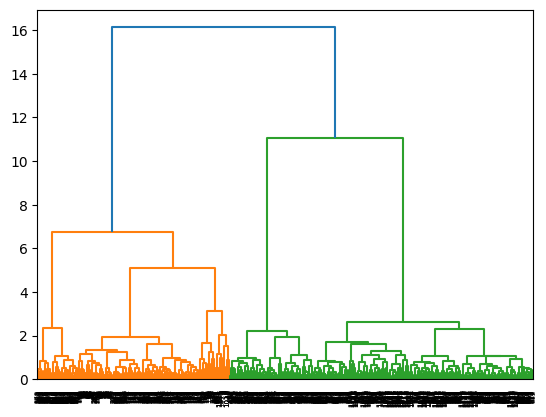

In [35]:
array_list = []
for track in temp_df["Track"].unique():
    array_list.append(np.array(list(temp_df[temp_df["Track"] == track]["Encoding"])))

combined_data = np.vstack(array_list)

# Apply hierarchical clustering
linkage_matrix = linkage(combined_data, method='ward')  # You can try different linkage methods

# Visualize the dendrogram
dendrogram(linkage_matrix)
plt.show()

In [45]:
# Determine the number of clusters based on the dendrogram
# Cut the dendrogram at an appropriate height
for num_clusters in range(2,6):
    print(num_clusters)
    
    # Apply agglomerative clustering with the determined number of clusters
    model = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = model.fit_predict(combined_data)
    
    silhouette_avg = silhouette_score(combined_data, cluster_labels)
    print(silhouette_avg)

2
0.4119081641564466
3
0.4703286875488123
4
0.4773552181272578
5
0.49590113644503586


In [41]:
class_labels

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

/home/sunil/projects/Stuff/Combined/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/sunil/projects/Stuff/Combined/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/sunil/projects/Stuff/Combined/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/sunil/projects/Stuff/Combined/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1

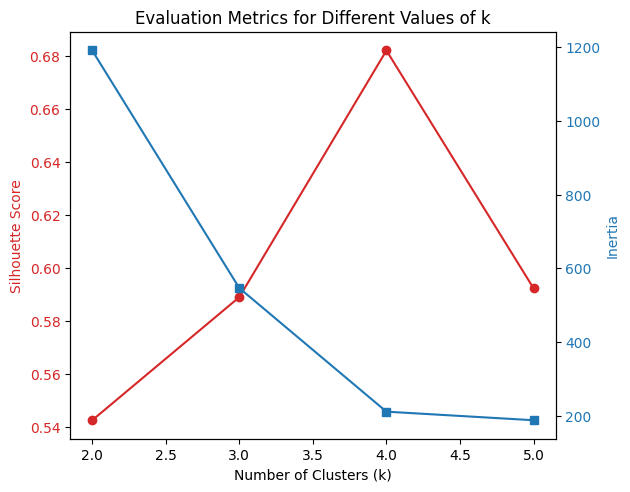

In [1]:


# Generate sample data (replace this with your own dataset)
np.random.seed(42)
X, _ = datasets.make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Define the range of k values
k_values = range(2, 6)

# Dictionary to store evaluation metrics for each k
metrics = {'silhouette': [], 'inertia': []}

# Perform k-means clustering for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    
    # Silhouette score
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    metrics['silhouette'].append(silhouette_avg)
    
    # Inertia (within-cluster sum of squares)
    metrics['inertia'].append(kmeans.inertia_)

# Plot the evaluation metrics
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(k_values, metrics['silhouette'], 'o-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Inertia', color=color)
ax2.plot(k_values, metrics['inertia'], 's-', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Evaluation Metrics for Different Values of k')
plt.show()

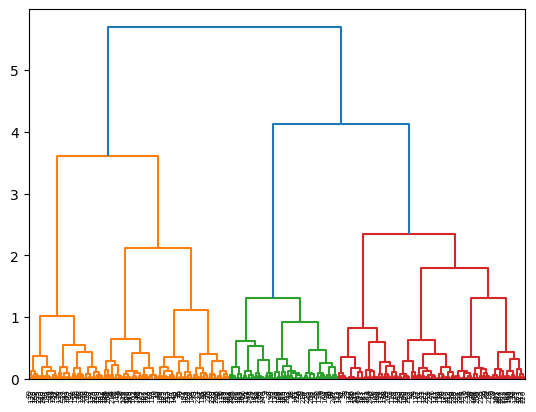

In [10]:
# Determine the number of clusters based on the dendrogram
# Cut the dendrogram at an appropriate height
num_clusters = 3  # Adjust this based on your observation

# Apply agglomerative clustering with the determined number of clusters
model = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = model.fit_predict(combined_data)

# Assign class labels to original arrays based on the obtained clusters
class_labels = cluster_labels[:len(array1)], cluster_labels[len(array1):len(array1)+len(array2)], \
                cluster_labels[len(array1)+len(array2):len(array1)+len(array2)+len(array3)], \
                cluster_labels[len(array1)+len(array2)+len(array3):len(array1)+len(array2)+len(array3)+len(array4)], \
                cluster_labels[len(array1)+len(array2)+len(array3)+len(array4):]